In [ ]:
!pip install easyocr


import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16


reader = easyocr.Reader(['en'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 34.7 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

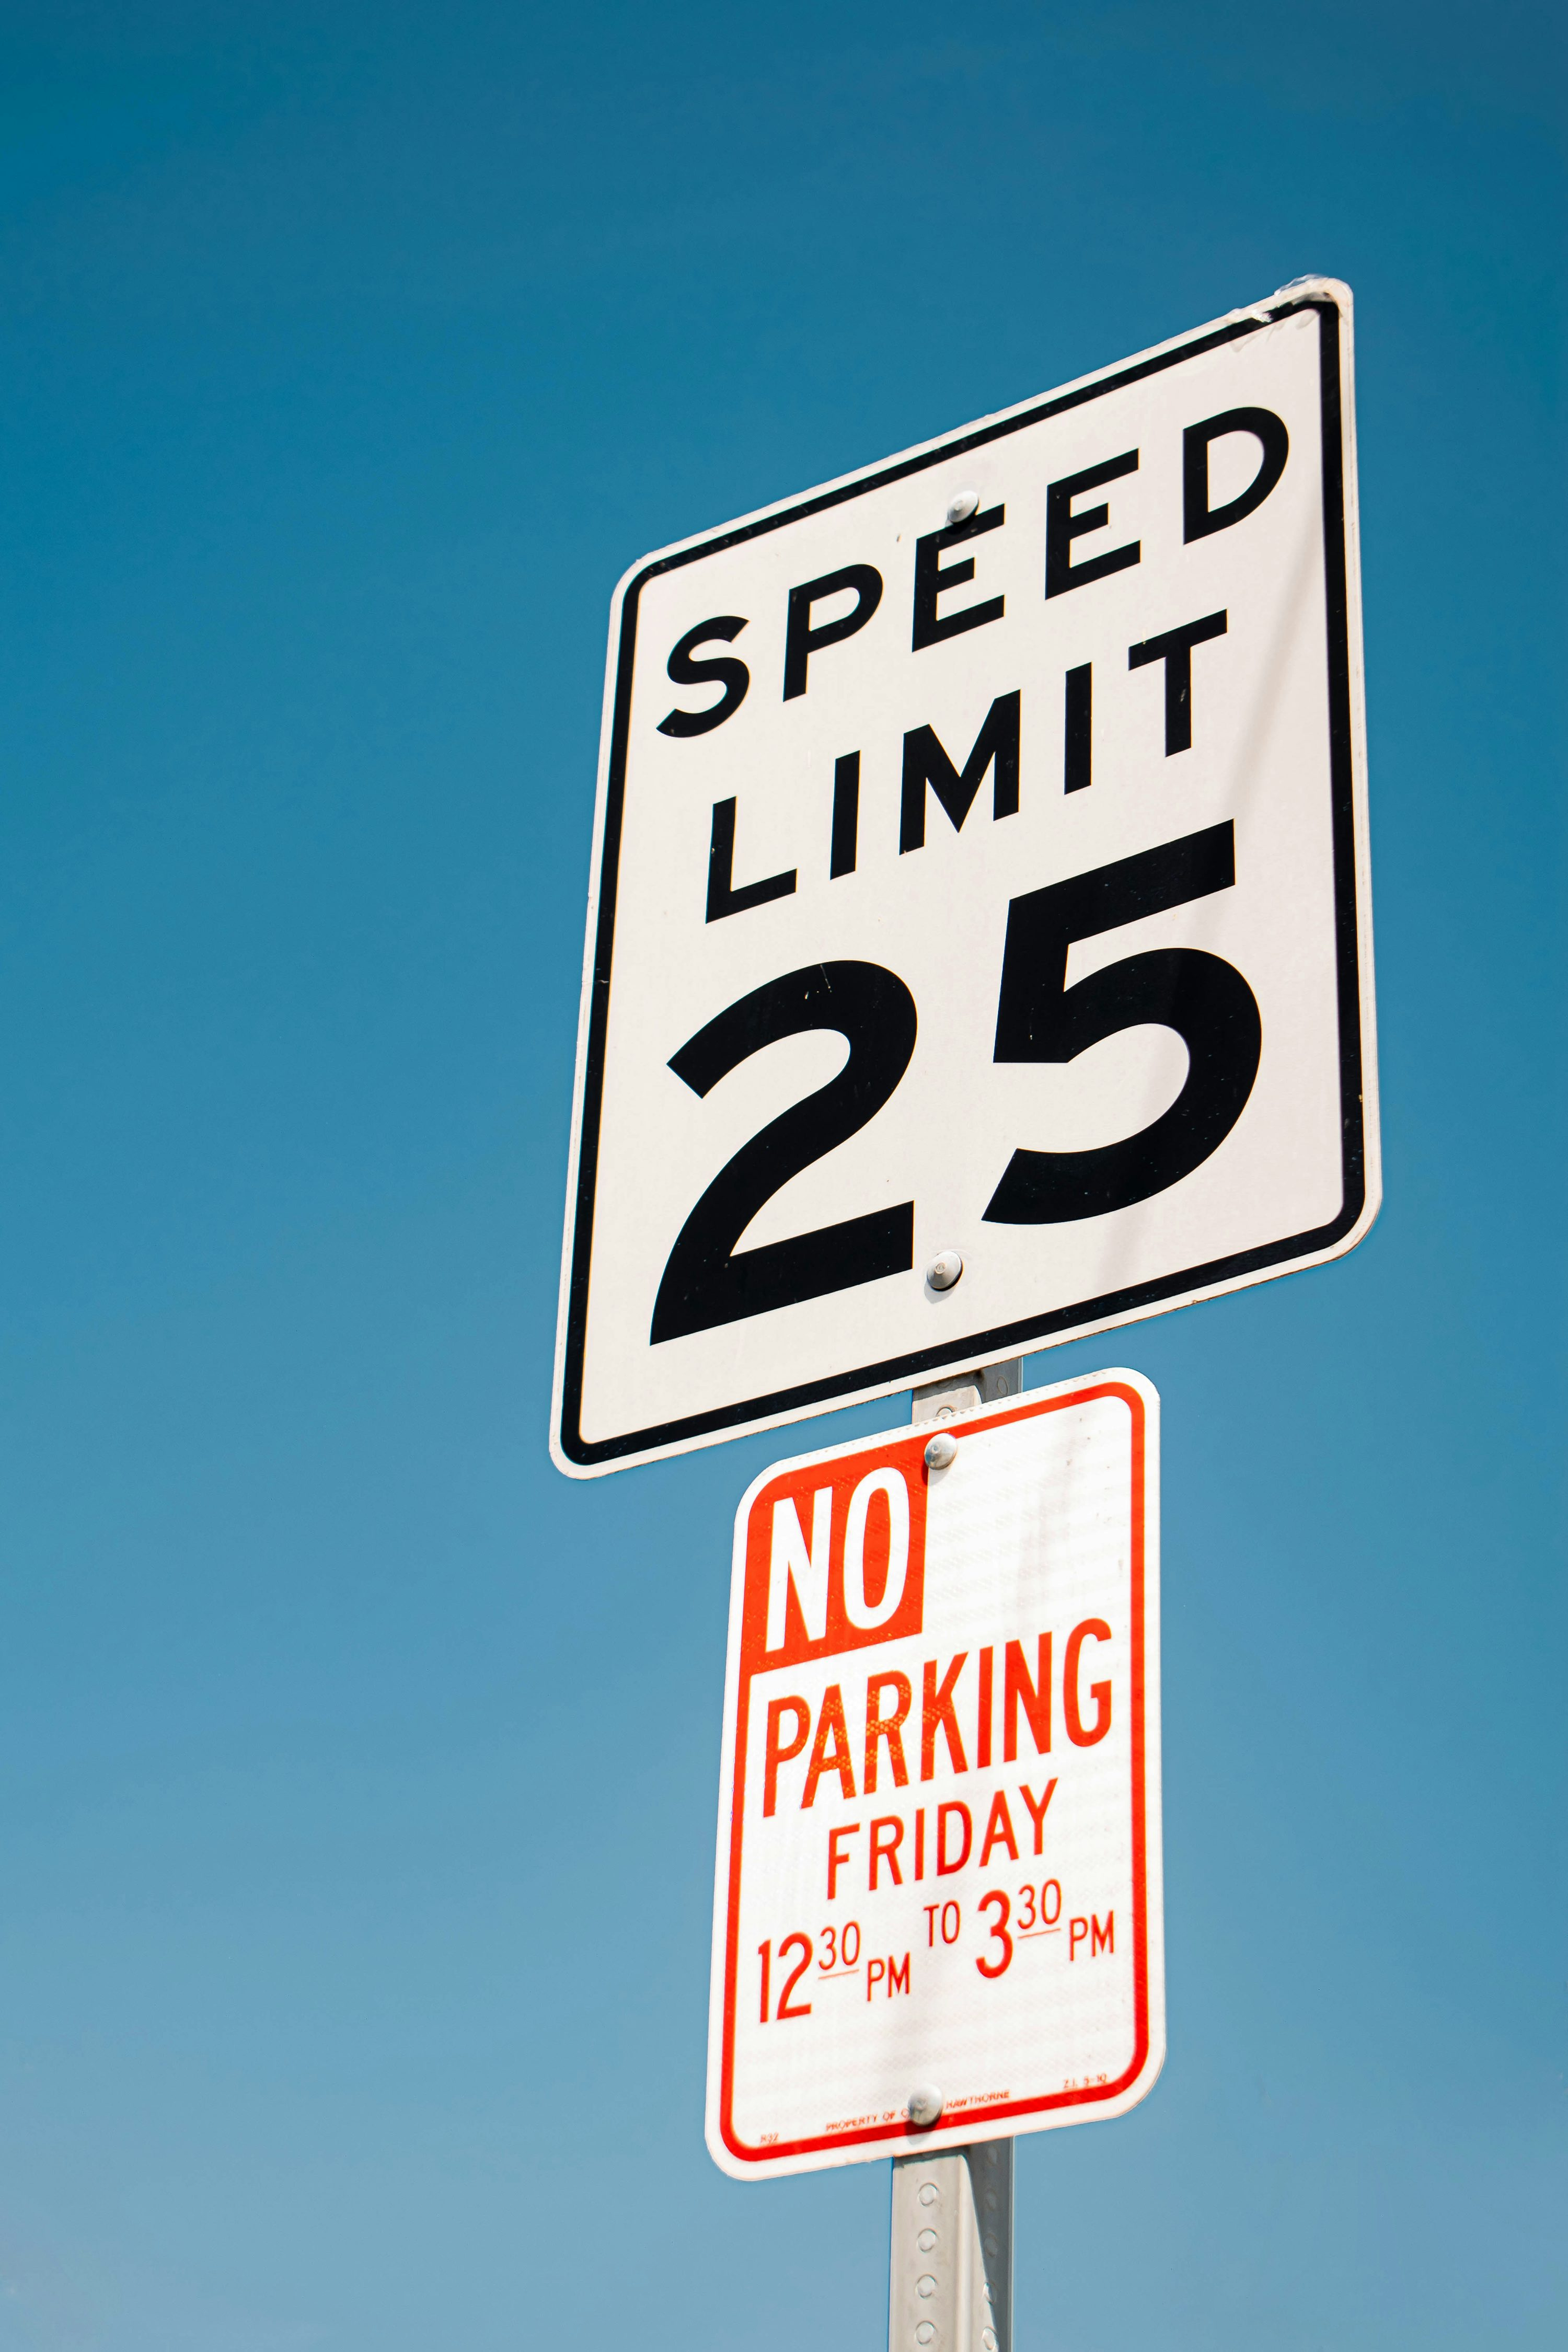

In [ ]:
Image("IMG_5151.JPG")

In [ ]:
def reading_order_multiline(output, y_threshold=20):
    words = []

    # extract top-left corner
    for bbox, text, conf in output:
        xs = [p[0] for p in bbox]
        ys = [p[1] for p in bbox]
        x_min = min(xs)
        y_min = min(ys)
        words.append((x_min, y_min, text))

    # sort by y
    words.sort(key=lambda x: x[1])

    lines = []
    for word in words:
        placed = False
        for line in lines:
            # if y close → same line
            if abs(line[0][1] - word[1]) < y_threshold:
                line.append(word)
                placed = True
                break
        if not placed:
            lines.append([word])

    # sort words in each line left → right
    for line in lines:
        line.sort(key=lambda x: x[0])

    # join text
    final_text = []
    for line in lines:
        final_text.append(" ".join([w[2] for w in line]))

    return " ".join(final_text)


In [ ]:
output = reader.readtext('IMG_5151.JPG')
predicted_text = reading_order_multiline(output)
print(predicted_text)

SPEED LIMIT 25 NO PARKING FRIDAY 38PM 1230 TO PM Vhunne


In [ ]:
pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 54.9 MB/s eta 0:00:00


In [ ]:
gt="SPEED LIMIT 25 NO PARKING FRIDAY 12 30 PM TO 330 PM"
from jiwer import wer, cer
pred = predicted_text

cer1= cer(gt, pred)
wer1= wer(gt, pred)
print("CER:", cer1)
print("WER:", wer1)


CER: 0.3137254901960784
WER: 0.4166666666666667


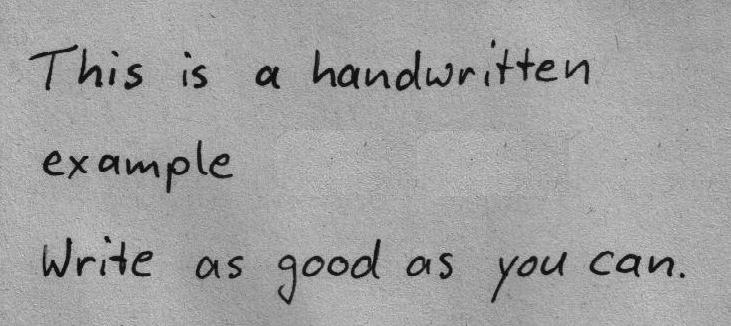

In [ ]:
Image("IMG_5152.PNG")

In [ ]:
output2 = reader.readtext('IMG_5152.PNG')
predicted_text2 = reading_order_multiline(output2)
print(predicted_text2)

This is handwr #ten 1 ex awple Wrie Jood 0$ You can. Ms


In [ ]:
gt2="This is a handwritten example Write as good as you can."
pred2 = predicted_text2
cer2= cer(gt2, pred2)
wer2= wer(gt2, pred2)

print("CER:", cer2)
print("WER:", wer2)

CER: 0.34545454545454546
WER: 0.9090909090909091


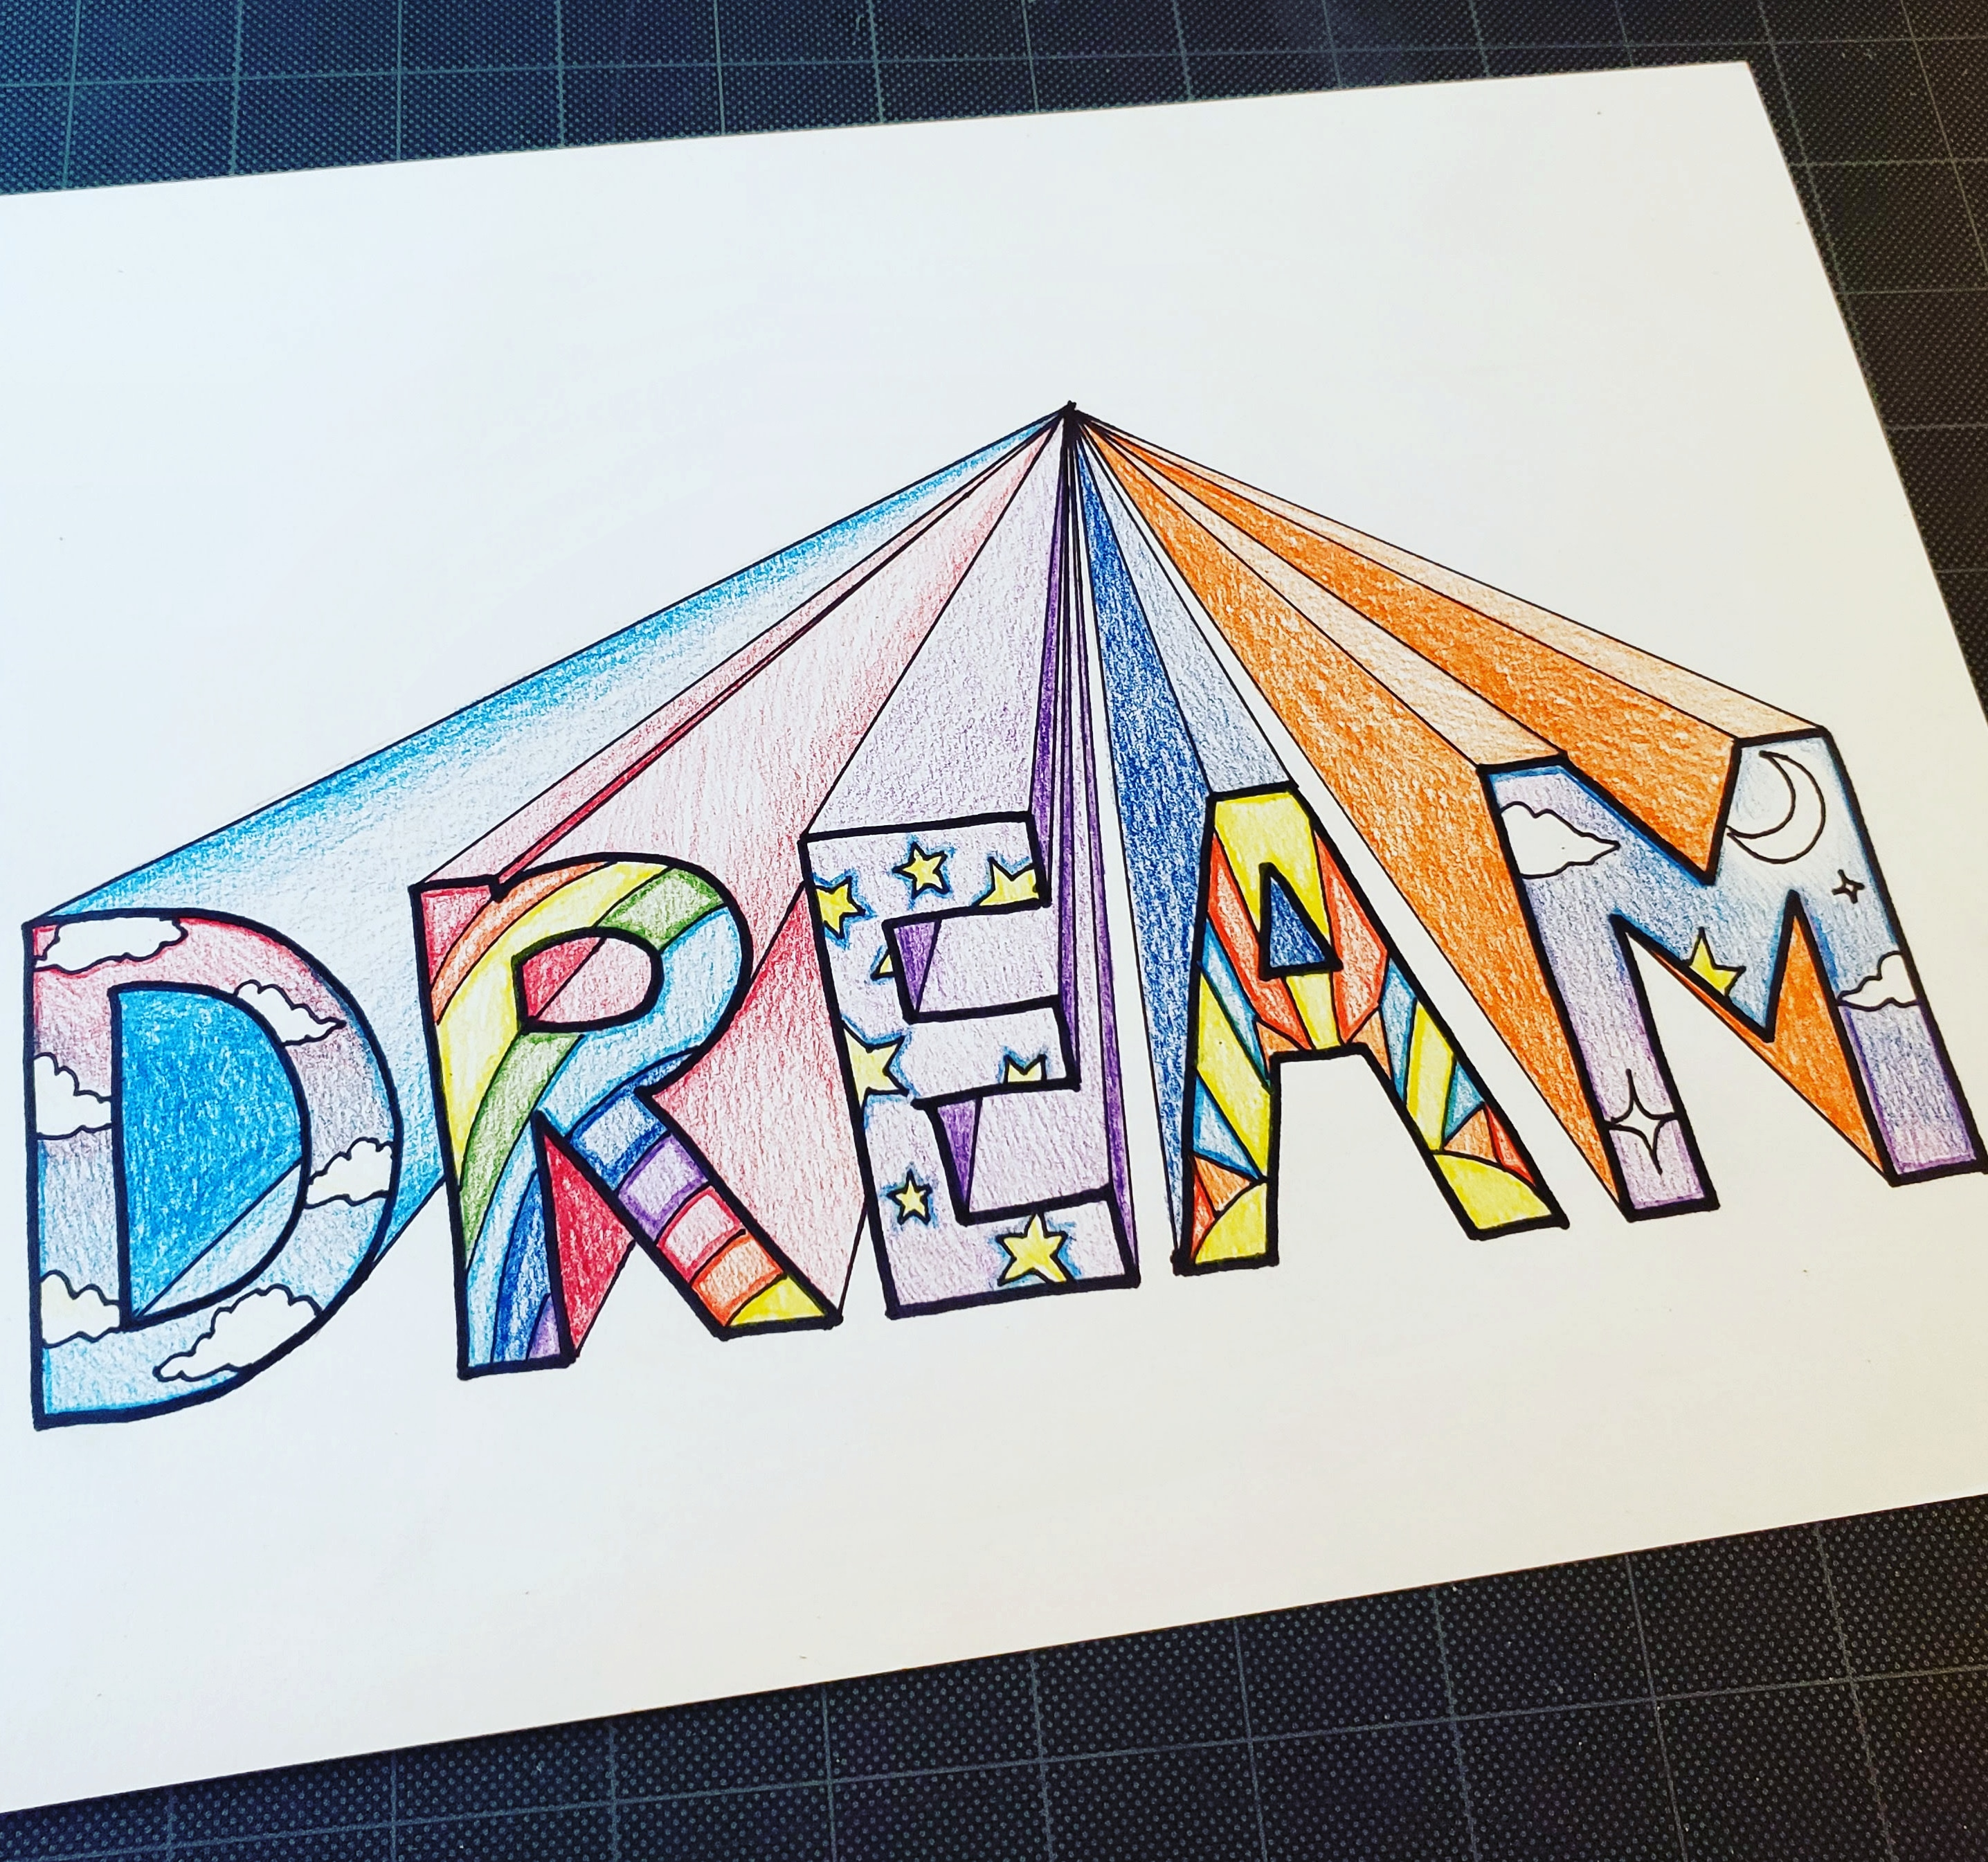

In [ ]:
Image("IMG_5153.JPG")

In [ ]:
output3 = reader.readtext('IMG_5153.JPG')
predicted_text3 = reading_order_multiline(output3)
print(predicted_text3)

In [ ]:
gt3="DREAM"
pred3 = predicted_text3

cer3= cer(gt3, pred3)
wer3= wer(gt3, pred3)

print("CER:", cer3)
print("WER:", wer3)

CER: 1.0
WER: 1.0


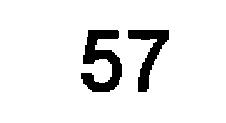

In [ ]:
Image("IMG_5154.JPG")

In [ ]:
output4 = reader.readtext('IMG_5154.JPG')
predicted_text4 = reading_order_multiline(output4)
print(predicted_text4)

57


In [ ]:
gt4="57"
pred4 = predicted_text4

cer4= cer(gt4, pred4)
wer4= wer(gt4, pred4)

print("CER:", cer4)
print("WER:", wer4)

CER: 0.0
WER: 0.0


In [ ]:
cer=(cer1+cer2+cer3+cer4)/4
wer=(wer1+wer2+wer3+wer4)/4
print("CER:", cer)
print("WER:", wer)

CER: 0.41479500891265597
WER: 0.5814393939393939
